In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.6.0


In [2]:
NUM_WORDS = 1000

(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=NUM_WORDS)

def multi_hot_sequences(sequences, dimension):
    # 0으로 채워진 (len(sequences), dimension) 크기의 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, word_indices in enumerate(sequences):
        results[i, word_indices] = 1.0  # results[i]의 특정 인덱스만 1로 설정합니다
    return results


train_data = multi_hot_sequences(train_data, dimension=NUM_WORDS)
test_data = multi_hot_sequences(test_data, dimension=NUM_WORDS)

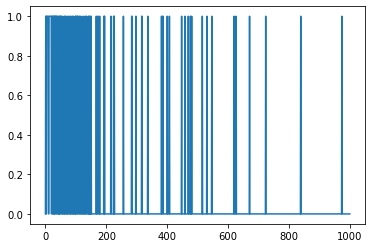

In [3]:
plt.plot(train_data[0])

In [4]:
baseline_model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam',
                       loss='binary_crossentropy',
                       metrics=['accuracy', 'binary_crossentropy'])

baseline_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                16016     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 16,305
Trainable params: 16,305
Non-trainable params: 0
_________________________________________________________________


In [5]:
baseline_history = baseline_model.fit(train_data,
                                      train_labels,
                                      epochs=20,
                                      batch_size=512,
                                      validation_data=(test_data, test_labels),
                                      verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6424 - accuracy: 0.6436 - binary_crossentropy: 0.6424 - val_loss: 0.5283 - val_accuracy: 0.7959 - val_binary_crossentropy: 0.5283
Epoch 2/20
49/49 - 0s - loss: 0.4211 - accuracy: 0.8317 - binary_crossentropy: 0.4211 - val_loss: 0.3655 - val_accuracy: 0.8487 - val_binary_crossentropy: 0.3655
Epoch 3/20
49/49 - 0s - loss: 0.3350 - accuracy: 0.8616 - binary_crossentropy: 0.3350 - val_loss: 0.3338 - val_accuracy: 0.8593 - val_binary_crossentropy: 0.3338
Epoch 4/20
49/49 - 0s - loss: 0.3129 - accuracy: 0.8718 - binary_crossentropy: 0.3129 - val_loss: 0.3305 - val_accuracy: 0.8608 - val_binary_crossentropy: 0.3305
Epoch 5/20
49/49 - 0s - loss: 0.3048 - accuracy: 0.8748 - binary_crossentropy: 0.3048 - val_loss: 0.3274 - val_accuracy: 0.8616 - val_binary_crossentropy: 0.3274
Epoch 6/20
49/49 - 0s - loss: 0.2995 - accuracy: 0.8771 - binary_crossentropy: 0.2995 - val_loss: 0.3294 - val_accuracy: 0.8602 - val_binary_crossentropy: 0.3294
Epoch 7/20
49/49 - 0s - loss

In [6]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

smaller_model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy', 'binary_crossentropy'])

smaller_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 4004      
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 4,029
Trainable params: 4,029
Non-trainable params: 0
_________________________________________________________________


In [7]:
smaller_history = smaller_model.fit(train_data,
                                    train_labels,
                                    epochs=20,
                                    batch_size=512,
                                    validation_data=(test_data, test_labels),
                                    verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6451 - accuracy: 0.6832 - binary_crossentropy: 0.6451 - val_loss: 0.5821 - val_accuracy: 0.7763 - val_binary_crossentropy: 0.5821
Epoch 2/20
49/49 - 0s - loss: 0.5094 - accuracy: 0.8101 - binary_crossentropy: 0.5094 - val_loss: 0.4535 - val_accuracy: 0.8286 - val_binary_crossentropy: 0.4535
Epoch 3/20
49/49 - 0s - loss: 0.4118 - accuracy: 0.8444 - binary_crossentropy: 0.4118 - val_loss: 0.3926 - val_accuracy: 0.8453 - val_binary_crossentropy: 0.3926
Epoch 4/20
49/49 - 0s - loss: 0.3654 - accuracy: 0.8551 - binary_crossentropy: 0.3654 - val_loss: 0.3629 - val_accuracy: 0.8528 - val_binary_crossentropy: 0.3629
Epoch 5/20
49/49 - 0s - loss: 0.3411 - accuracy: 0.8626 - binary_crossentropy: 0.3411 - val_loss: 0.3502 - val_accuracy: 0.8562 - val_binary_crossentropy: 0.3502
Epoch 6/20
49/49 - 0s - loss: 0.3261 - accuracy: 0.8678 - binary_crossentropy: 0.3261 - val_loss: 0.3382 - val_accuracy: 0.8590 - val_binary_crossentropy: 0.3382
Epoch 7/20
49/49 - 0s - loss

In [8]:
bigger_model = keras.models.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

bigger_model.compile(optimizer='adam',
                     loss='binary_crossentropy',
                     metrics=['accuracy','binary_crossentropy'])

bigger_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               512512    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 775,681
Trainable params: 775,681
Non-trainable params: 0
_________________________________________________________________


In [9]:
bigger_history = bigger_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.4188 - accuracy: 0.8073 - binary_crossentropy: 0.4188 - val_loss: 0.3436 - val_accuracy: 0.8520 - val_binary_crossentropy: 0.3436
Epoch 2/20
49/49 - 1s - loss: 0.2916 - accuracy: 0.8792 - binary_crossentropy: 0.2916 - val_loss: 0.3292 - val_accuracy: 0.8578 - val_binary_crossentropy: 0.3292
Epoch 3/20
49/49 - 1s - loss: 0.2340 - accuracy: 0.9072 - binary_crossentropy: 0.2340 - val_loss: 0.3349 - val_accuracy: 0.8544 - val_binary_crossentropy: 0.3349
Epoch 4/20
49/49 - 1s - loss: 0.1186 - accuracy: 0.9630 - binary_crossentropy: 0.1186 - val_loss: 0.4127 - val_accuracy: 0.8477 - val_binary_crossentropy: 0.4127
Epoch 5/20
49/49 - 1s - loss: 0.0274 - accuracy: 0.9958 - binary_crossentropy: 0.0274 - val_loss: 0.5375 - val_accuracy: 0.8462 - val_binary_crossentropy: 0.5375
Epoch 6/20
49/49 - 1s - loss: 0.0052 - accuracy: 0.9998 - binary_crossentropy: 0.0052 - val_loss: 0.6203 - val_accuracy: 0.8493 - val_binary_crossentropy: 0.6203
Epoch 7/20
49/49 - 1s - loss

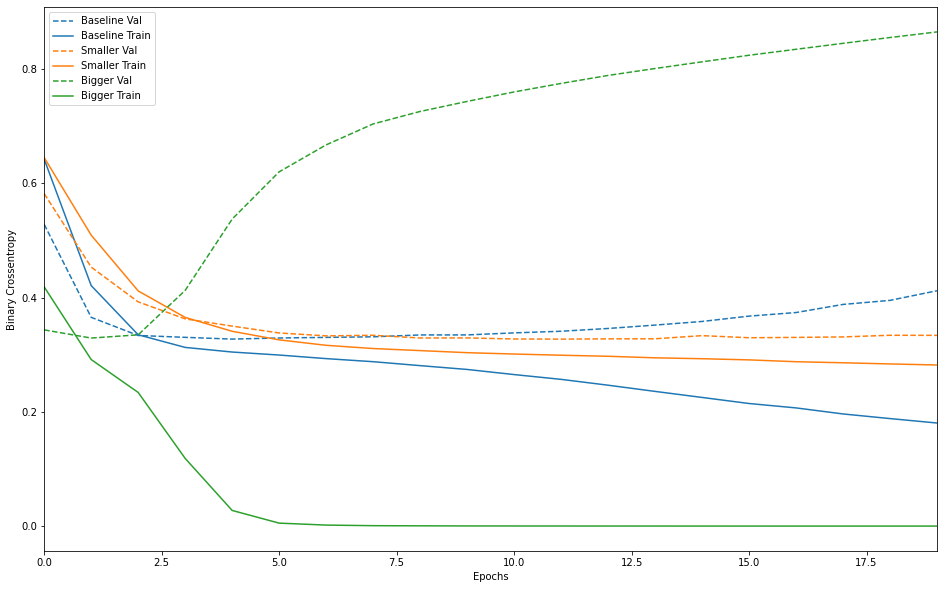

In [10]:
def plot_history(histories, key='binary_crossentropy'):
  plt.figure(figsize=(16,10))

  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])


plot_history([('baseline', baseline_history),
              ('smaller', smaller_history),
              ('bigger', bigger_history)])

In [11]:
l2_model = keras.models.Sequential([
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dense(16, kernel_regularizer=keras.regularizers.l2(0.001),
                       activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

l2_model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy', 'binary_crossentropy'])

l2_model_history = l2_model.fit(train_data, train_labels,
                                epochs=20,
                                batch_size=512,
                                validation_data=(test_data, test_labels),
                                verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6225 - accuracy: 0.7182 - binary_crossentropy: 0.5791 - val_loss: 0.4820 - val_accuracy: 0.8211 - val_binary_crossentropy: 0.4404
Epoch 2/20
49/49 - 0s - loss: 0.4184 - accuracy: 0.8454 - binary_crossentropy: 0.3770 - val_loss: 0.3912 - val_accuracy: 0.8534 - val_binary_crossentropy: 0.3504
Epoch 3/20
49/49 - 0s - loss: 0.3692 - accuracy: 0.8637 - binary_crossentropy: 0.3290 - val_loss: 0.3734 - val_accuracy: 0.8589 - val_binary_crossentropy: 0.3343
Epoch 4/20
49/49 - 0s - loss: 0.3516 - accuracy: 0.8711 - binary_crossentropy: 0.3132 - val_loss: 0.3676 - val_accuracy: 0.8599 - val_binary_crossentropy: 0.3301
Epoch 5/20
49/49 - 0s - loss: 0.3446 - accuracy: 0.8738 - binary_crossentropy: 0.3079 - val_loss: 0.3639 - val_accuracy: 0.8610 - val_binary_crossentropy: 0.3280
Epoch 6/20
49/49 - 0s - loss: 0.3390 - accuracy: 0.8751 - binary_crossentropy: 0.3038 - val_loss: 0.3633 - val_accuracy: 0.8604 - val_binary_crossentropy: 0.3289
Epoch 7/20
49/49 - 0s - loss

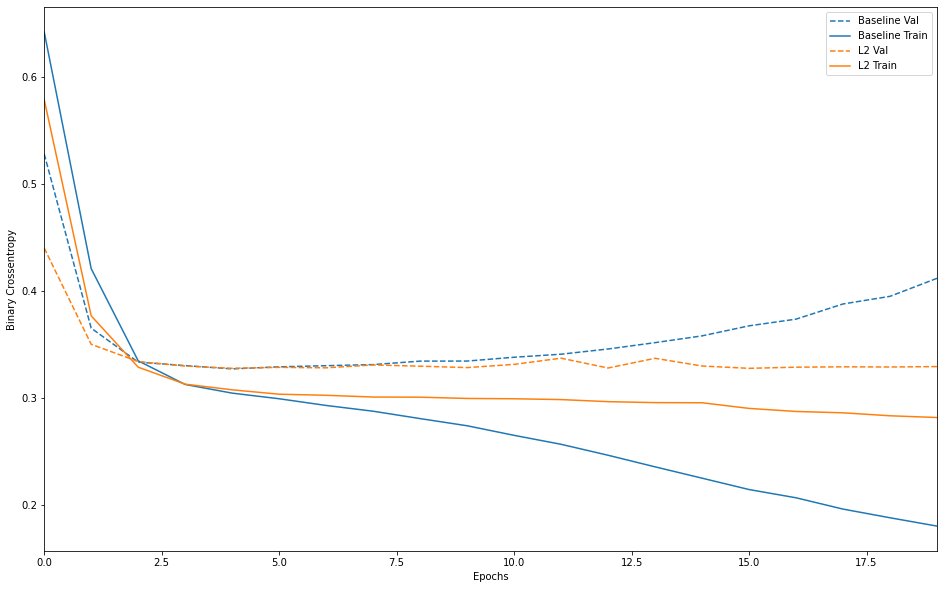

In [12]:
plot_history([('baseline', baseline_history),
              ('l2', l2_model_history)])

In [13]:
dpt_model = keras.models.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(NUM_WORDS,)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

dpt_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy','binary_crossentropy'])

dpt_model_history = dpt_model.fit(train_data, train_labels,
                                  epochs=20,
                                  batch_size=512,
                                  validation_data=(test_data, test_labels),
                                  verbose=2)

Epoch 1/20
49/49 - 1s - loss: 0.6971 - accuracy: 0.5320 - binary_crossentropy: 0.6971 - val_loss: 0.6838 - val_accuracy: 0.6194 - val_binary_crossentropy: 0.6838
Epoch 2/20
49/49 - 0s - loss: 0.6591 - accuracy: 0.6332 - binary_crossentropy: 0.6591 - val_loss: 0.6282 - val_accuracy: 0.7214 - val_binary_crossentropy: 0.6282
Epoch 3/20
49/49 - 0s - loss: 0.5897 - accuracy: 0.7329 - binary_crossentropy: 0.5897 - val_loss: 0.5404 - val_accuracy: 0.7896 - val_binary_crossentropy: 0.5404
Epoch 4/20
49/49 - 0s - loss: 0.5328 - accuracy: 0.7942 - binary_crossentropy: 0.5328 - val_loss: 0.4801 - val_accuracy: 0.8383 - val_binary_crossentropy: 0.4801
Epoch 5/20
49/49 - 0s - loss: 0.4947 - accuracy: 0.8150 - binary_crossentropy: 0.4947 - val_loss: 0.4463 - val_accuracy: 0.8470 - val_binary_crossentropy: 0.4463
Epoch 6/20
49/49 - 0s - loss: 0.4590 - accuracy: 0.8319 - binary_crossentropy: 0.4590 - val_loss: 0.4196 - val_accuracy: 0.8520 - val_binary_crossentropy: 0.4196
Epoch 7/20
49/49 - 0s - loss

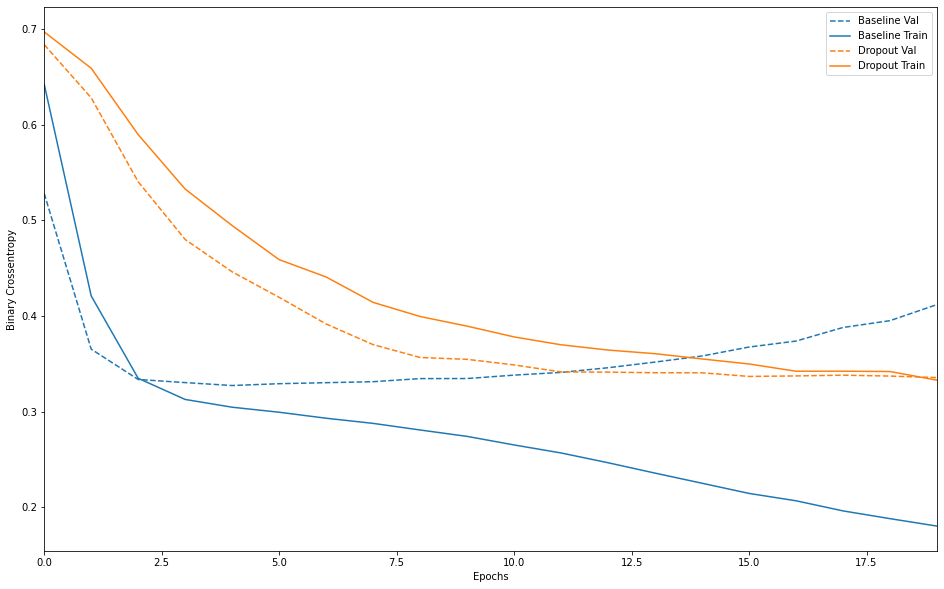

In [14]:
plot_history([('baseline', baseline_history),
              ('dropout', dpt_model_history)])